In [38]:
# Import our dependencies
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [39]:
# Read in the data
df = pd.read_csv('games-data.csv')
df.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",2-Jan,19,647
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,8-Sep-99,98,8.5,Namco,"Action,Fighting,3D",2-Jan,24,324
4,Grand Theft Auto IV,Xbox360,29-Apr-08,98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [40]:
# Inspect data 
df.dtypes

name          object
platform      object
r-date        object
score          int64
user score    object
developer     object
genre         object
players       object
critics        int64
users          int64
dtype: object

In [41]:
# Check for null rows
df.isnull().sum()

name           0
platform       0
r-date         0
score          0
user score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64

In [42]:
# Drop unneeded columns
df = df.drop(['name', 'players', 'platform', 'r-date', 'user score', 'genre'], axis=1)
df.head()

,score,developer,critics,users
0,99,Nintendo,22,5749
1,98,NeversoftEntertainment,19,647
2,98,RockstarNorth,64,3806
3,98,Namco,24,324
4,98,RockstarNorth,86,3364


In [43]:
# Get a count of unique values for developers
dev_counts = df.developer.value_counts()
dev_counts

Capcom                        298
TelltaleGames                 236
EASports                      195
Konami                        176
EACanada                      172
                             ... 
LudicStudios                    1
AdelineSoftware                 1
Librage                         1
Wargaming.net,PershaStudia      1
GravityCorporation,Gravity      1
Name: developer, Length: 4253, dtype: int64

<AxesSubplot:ylabel='Density'>

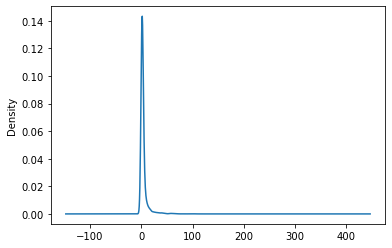

In [44]:
# Visualize the value counts
dev_counts.plot.density()

In [45]:
# Determine which values to replace
replace_dev = list(dev_counts[dev_counts < 100].index)

# Replace in DataFrame
for dev in replace_dev:
    df.developer = df.developer.replace(dev, "Other")
    
# Check to make sure binning was successful
df.developer.value_counts()

Other              16035
Capcom               298
TelltaleGames        236
EASports             195
Konami               176
EACanada             172
UbisoftMontreal      146
Nintendo             142
Ubisoft              136
SquareEnix           107
ElectronicArts       101
EATiburon            100
Codemasters          100
Name: developer, dtype: int64

In [46]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.developer.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['developer'])
encode_df.head()

C:\Users\edinc\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,developer_Capcom,developer_Codemasters,developer_EACanada,developer_EASports,developer_EATiburon,developer_ElectronicArts,developer_Konami,developer_Nintendo,developer_Other,developer_SquareEnix,developer_TelltaleGames,developer_Ubisoft,developer_UbisoftMontreal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# Merge the two DataFrames together and drop the developer column
df = df.merge(encode_df,left_index=True,right_index=True).drop("developer",1)
df.head()

C:\Users\edinc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,score,critics,users,developer_Capcom,developer_Codemasters,developer_EACanada,developer_EASports,developer_EATiburon,developer_ElectronicArts,developer_Konami,developer_Nintendo,developer_Other,developer_SquareEnix,developer_TelltaleGames,developer_Ubisoft,developer_UbisoftMontreal
0,99,22,5749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,98,19,647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,98,64,3806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,98,24,324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,98,86,3364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
df.dtypes

score                          int64
critics                        int64
users                          int64
developer_Capcom             float64
developer_Codemasters        float64
developer_EACanada           float64
developer_EASports           float64
developer_EATiburon          float64
developer_ElectronicArts     float64
developer_Konami             float64
developer_Nintendo           float64
developer_Other              float64
developer_SquareEnix         float64
developer_TelltaleGames      float64
developer_Ubisoft            float64
developer_UbisoftMontreal    float64
dtype: object

In [58]:
# Split our preprocessed data into our features and target arrays
y = df["score"].values
X = df.drop("score", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [61]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train, y_train)

In [64]:
# Making predictions using the testing data.
predictions = model.predict(X_test)
predictions

array([71, 75, 28, ..., 78, 58, 55], dtype=int64)

In [68]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.02808738296923763